In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.csv to train.csv
User uploaded file "train.csv" with length 25525678 bytes


In [ ]:
import pandas as pd

In [ ]:
! ls -a

.  ..  .config	sample_data  train.csv


In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
len(df)

550068

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Purchase', ylabel='Count'>

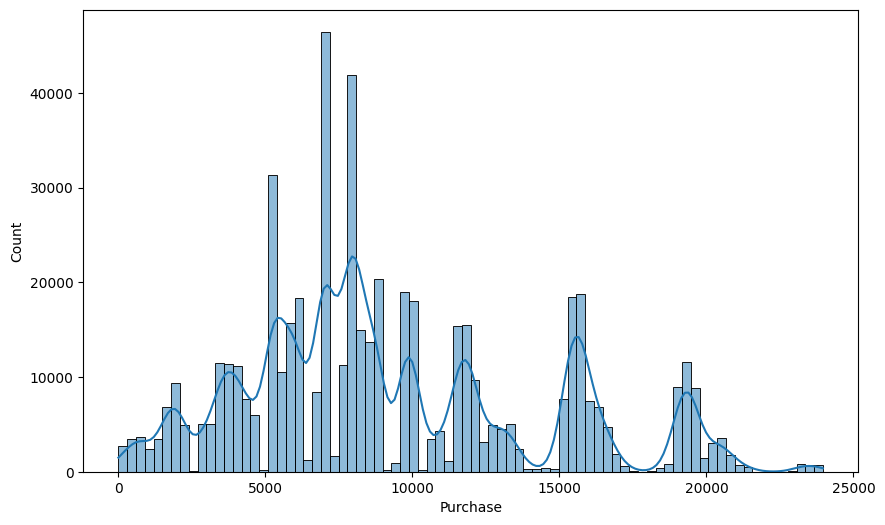

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Purchase', bins=80, kde=True)

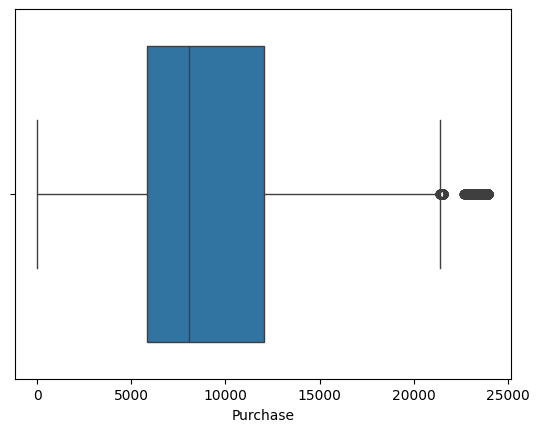

In [ ]:
sns.boxplot(data=df, x='Purchase')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

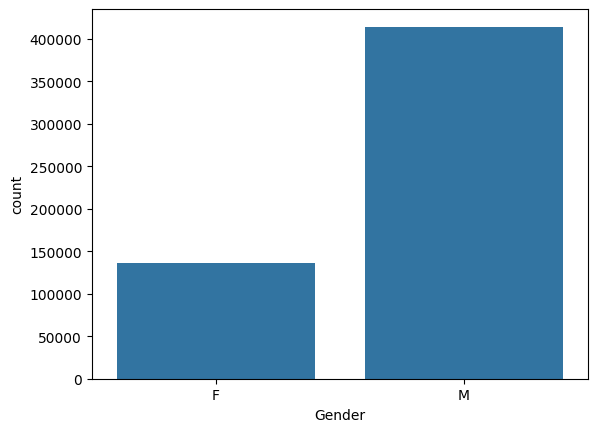

In [ ]:
sns.countplot(data=df, x='Gender')

<Axes: xlabel='Marital_Status', ylabel='count'>

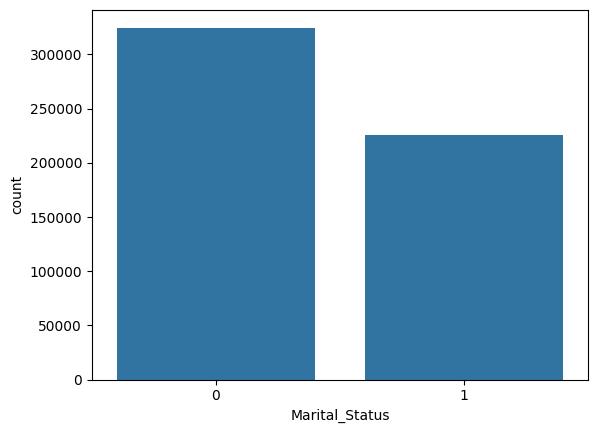

In [ ]:
sns.countplot(data=df, x='Marital_Status')

<ipython-input-17-d82e1221036b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x='Gender', palette='Set3')


<Axes: xlabel='Gender', ylabel='Purchase'>

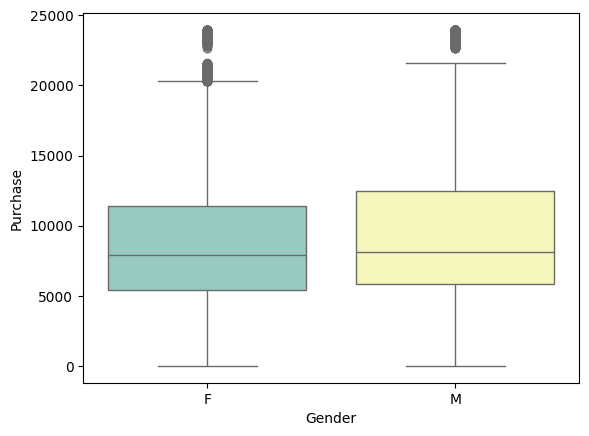

In [ ]:
sns.boxplot(data=df, y='Purchase', x='Gender', palette='Set3')

<ipython-input-18-602dd8924426>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x='Marital_Status', palette='Set3')


<Axes: xlabel='Marital_Status', ylabel='Purchase'>

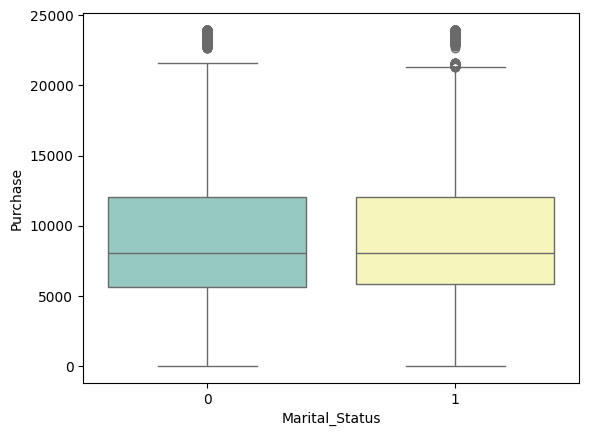

In [ ]:
sns.boxplot(data=df, y='Purchase', x='Marital_Status', palette='Set3')

<ipython-input-21-c6188586de4a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x='Age', palette='Set3')


<Axes: xlabel='Age', ylabel='Purchase'>

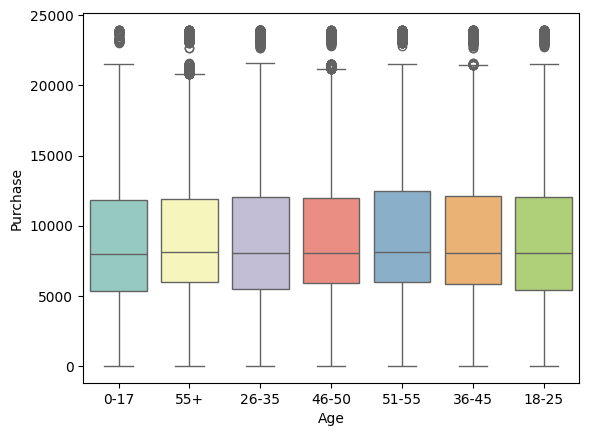

In [ ]:
sns.boxplot(data=df, y='Purchase', x='Age', palette='Set3')

In [ ]:
df_gender = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
df_gender = df_gender.reset_index()

In [ ]:
df_gender

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [ ]:
df_gender['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

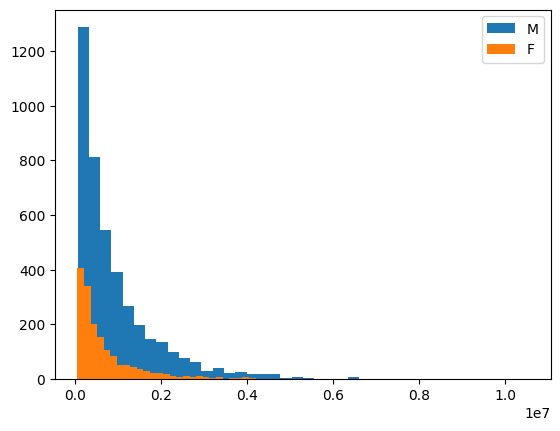

In [ ]:
plt.hist(df_gender[df_gender.Gender=='M']['Purchase'], label='M', bins=40)
plt.hist(df_gender[df_gender.Gender=='F']['Purchase'], label='F', bins=40)
plt.legend()
plt.show()

In [ ]:
male_avg = df_gender[df_gender.Gender=='M']['Purchase'].mean()
female_avg = df_gender[df_gender.Gender=='F']['Purchase'].mean()

In [ ]:
male_avg, female_avg

(925344.4023668639, 712024.3949579832)

In [ ]:
genders=['M','F']
male_sample_size = 600
female_sample_size = 600
num_repetitions=10000
male_means = []
female_means = []
male_df = df_gender[df_gender.Gender=='M']
female_df = df_gender[df_gender.Gender=='F']

for _ in range(num_repetitions):
  mean_m = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
  mean_f = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()

  male_means.append(mean_m)
  female_means.append(mean_f)

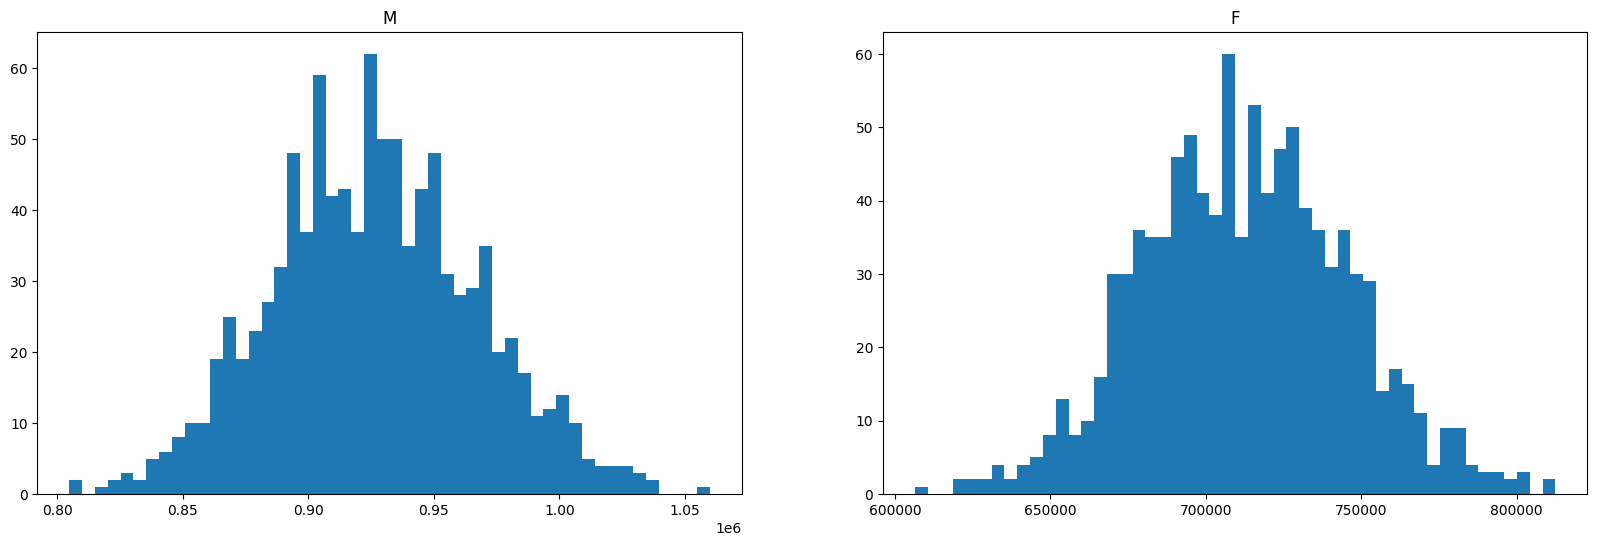

In [ ]:
fig, axis = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
axis[0].hist(male_means, bins=50)
axis[1].hist(female_means, bins=50)
axis[0].set_title('M')
axis[1].set_title('F')
plt.show()

std_sampling_means = std_p/sqrt(n)

In [ ]:
male_df['Purchase'].mean(), female_df['Purchase'].std(),

(925344.4023668639, 807370.7261464577)

In [ ]:
male_df['Purchase'].std()/np.sqrt(600), female_df['Purchase'].std()/np.sqrt(600)

(40246.345333753474, 32960.77187198591)

In [ ]:
np.std(male_means), np.std(female_means)

(41114.56208948903, 33129.12395387385)

In [ ]:
np.std(male_means), np.std(female_means)

(40229.0710750138, 32891.365713940955)

In [ ]:
alpha=95

In [ ]:
[mean-1.96 * std; mean + 1.96.std]

In [ ]:
male_margin_of_error = 1.96 * male_df['Purchase'].std() / np.sqrt(len(male_df))
female_margin_of_error = 1.96 * female_df['Purchase'].std()/np.sqrt(len(female_df))

In [ ]:
male_df['Purchase'].mean() - male_margin_of_error, male_df['Purchase'].mean() + male_margin_of_error

(895617.8331736492, 955070.9715600787)

In [ ]:
female_df['Purchase'].mean() - female_margin_of_error, female_df['Purchase'].mean() + female_margin_of_error

(673254.7725364959, 750794.0173794704)